# Numerical Methods – Programming Midterm Project

2018112749 전현승

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

# Q1

Gauss-seidel Method

In [2]:
A = np.array([[4, -1, 1], [-1, 4, -2], [1, -2, 4]]).astype('float64')
b = np.array([12, -1, 5]).astype('float64')

ground_truth = np.array([3, 1, 1]).astype('float64')

In [3]:
f1 = lambda x, y, z: (-y + z + 12) / 4
f2 = lambda x, y, z: (x + 2*z - 1) / 4
f3 = lambda x, y, z: (-x + 2*y + 5) / 4

x0 = 0
y0 = 0
z0 = 0

In [4]:
for i in range(9):
    x1 = f1(x0, y0, z0)
    y1 = f2(x1, y0, z0)
    z1 = f3(x1, y1, z0)
    print(f"iteration: {i}, x1: {x1:.4}, y1: {y1:.4}, z1: {z1:.4}")
    
    x0 = x1
    y0 = y1
    z0 = z1

iteration: 0, x1: 3.0, y1: 0.5, z1: 0.75
iteration: 1, x1: 3.062, y1: 0.8906, z1: 0.9297
iteration: 2, x1: 3.01, y1: 0.9673, z1: 0.9812
iteration: 3, x1: 3.003, y1: 0.9915, z1: 0.9949
iteration: 4, x1: 3.001, y1: 0.9976, z1: 0.9986
iteration: 5, x1: 3.0, y1: 0.9994, z1: 0.9996
iteration: 6, x1: 3.0, y1: 0.9998, z1: 0.9999
iteration: 7, x1: 3.0, y1: 1.0, z1: 1.0
iteration: 8, x1: 3.0, y1: 1.0, z1: 1.0


x1, y1, z1이 Ground Truth와 일치하게 구해졌으므로, True relative percentage error는 별도의 계산 과정 없이도 자명하게 0% 입니다.

# Q2

Bisection Method

In [5]:
def f(x):
    return x**3 -(10 * x**2) + 5

In [6]:
x_l = 0.0
x_u = 1.0

x = [(x_l + x_u) / 2]
approx_rel_error = []

In [7]:
for i in range(6):
    approx_err = 0 if i == 0 else abs(x[-1] - x[-2]) / x[-1] * 100

    x_r = x[-1]
    print(f"iteration {i}: ")
    print(f"x_l: {x_l:.6f}, x_u: {x_u:.6f}, x_r: {x_r:.6f}, f(x_r): {f(x_r):.6f}, approx_err: {approx_err:.6f}")

    if f(x_l)*f(x_u) > 0:
        x_u = x_r
    else:
        x_l = x_r
    x_r = (x_l + x_u) / 2
    x.append(x_r)
    approx_rel_error.append(approx_err)

iteration 0: 
x_l: 0.000000, x_u: 1.000000, x_r: 0.500000, f(x_r): 2.625000, approx_err: 0.000000
iteration 1: 
x_l: 0.500000, x_u: 1.000000, x_r: 0.750000, f(x_r): -0.203125, approx_err: 33.333333
iteration 2: 
x_l: 0.750000, x_u: 1.000000, x_r: 0.875000, f(x_r): -1.986328, approx_err: 14.285714
iteration 3: 
x_l: 0.750000, x_u: 0.875000, x_r: 0.812500, f(x_r): -1.065186, approx_err: 7.692308
iteration 4: 
x_l: 0.750000, x_u: 0.812500, x_r: 0.781250, f(x_r): -0.626678, approx_err: 4.000000
iteration 5: 
x_l: 0.750000, x_u: 0.781250, x_r: 0.765625, f(x_r): -0.413021, approx_err: 2.040816


# Q3

Newton-Raphson Method

In [8]:
def f(x):
    return x**2 - 2

def df(x):
    return 2 * x

In [9]:
# 실제 근은 sqrt(2)라 가정
actual_root = sqrt(2)

In [10]:
 x = [1.0]
true_rel_error = []

for i in range(0, 4):
    true_err = abs(actual_root - x[-1]) / actual_root * 100

    print(f"i: {i}, x_i: {x[-1]:.6f}, f(x_i): {f(x[-1]):.6f}, true_err: {true_err:.6f}")

    x.append(x[-1] - f(x[-1]) / df(x[-1]))
    true_rel_error.append(true_err)

i: 0, x_i: 1.000000, f(x_i): -1.000000, true_err: 29.289322
i: 1, x_i: 1.500000, f(x_i): 0.250000, true_err: 6.066017
i: 2, x_i: 1.416667, f(x_i): 0.006944, true_err: 0.173461
i: 3, x_i: 1.414216, f(x_i): 0.000006, true_err: 0.000150


# Q4

cubic spline

In [11]:
def cubic_spline(x_field, x, y):
    sz = len(x)

    diff_x = np.diff(x)
    diff_y = np.diff(y)

    Li = np.zeros(sz)
    Li_1 = np.zeros(sz - 1)
    z = np.zeros(sz)

    Li[0] = sqrt(2 * diff_x[0])
    Li_1[0] = 0.0
    B0 = 0.0 
    z[0] = B0 / Li[0]

    for i in range(1, sz-1):
        Li_1[i] = diff_x[i-1] / Li[i-1]
        Li[i] = sqrt(2*(diff_x[i-1] + diff_x[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(diff_y[i]/diff_x[i] - diff_y[i-1]/diff_x[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = sz - 1
    Li_1[i-1] = diff_x[-1] / Li[i-1]
    Li[i] = sqrt(2*diff_x[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # L^T * x = y
    i = sz - 1
    z[i] = z[i] / Li[i]
    for i in range(sz-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    index = x.searchsorted(x_field)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x_field)**3 + zi1/(6*hi1)*(x_field-xi0)**3 + (yi1/hi1 - zi1*hi1/6)*(x_field-xi0) + (yi0/hi1 - zi0*hi1/6)*(xi1-x_field)
    return f0

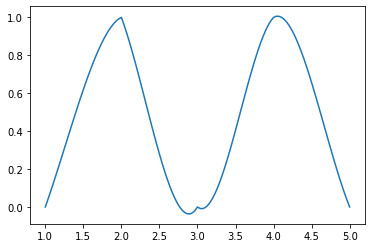

In [12]:
x = np.array([1, 2, 3, 4, 5]).astype('float64')
y = np.array([0, 1, 0, 1, 0]).astype('float64')

x_new = np.linspace(1, 5, 121)
res = cubic_spline(x_new, x, y)

plt.plot(x_new, res)
plt.show()

In [13]:
print(x_new[15])
print(res[15])

1.5
0.6190346803118543
